In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=0)
pima = pima.set_axis(col_names, axis=1, copy=False)

In [2]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
Y = pima.label
X = pima.drop(['label'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=True)

In [5]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [6]:
cls.fit(x_train, y_train)

/home/nik/Desktop/ML_course/MyWork/ML_courseVenv2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = cls.predict(x_test)

In [8]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

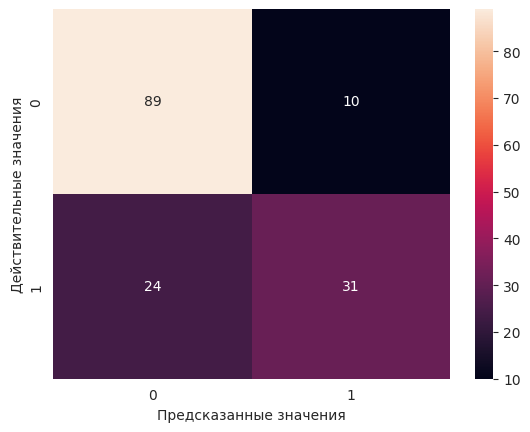

In [10]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

Что это означает?
89 - это кол-во тех людей, у которых нет диабета и модель предсказала это верно
31 - это кол-во тех людей, у которых есть диабет и модель предсказала это верно
24 - это кол-во тех людей, у которых в действительности есть диабет, но модель предсказала, что его нет (плохо)
10 - это кол-во людей, у которых нет диабета, но модель предсказала, что он есть (плохо, но не очень)

Как это называется
89 - true negative, классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
24 - false negative, классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.
31 - true positive, классификатор верно отнёс объект к рассматриваемому классу.
10 - false positive, классификатор неверно отнёс объект к рассматриваемому классу.

Метрика достоверности предсказания:

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Метрика точности

In [12]:
metrics.precision_score(y_test, y_pred)

0.7560975609756098

Метрика полноты

In [13]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636